In [1]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.support_functions import *

In [2]:
#Import Schizophrenia data
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose')
ts_features_c = pd.read_csv('ts_features_control.csv')
ts_features_p = pd.read_csv('ts_features_patient.csv')
ts_features = ts_features_c.append(ts_features_p)
ts_features = ts_features.reset_index()

## Loading in comparision paper case

In [3]:
#Import paper features
paper_features = pd.read_csv('schizophrenia-features.csv')
paper_features = paper_features.sort_values(by=['userid'])
paper_features = paper_features.reset_index(drop=True)

In [4]:
X_new = paper_features.drop(['userid', 'class', 'class_str'], axis =1 )
y_new = paper_features['class']

In [5]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = pd.DataFrame(scaler.fit_transform(X_new), columns= X_new.columns.values)
# pca of features spaces 
pca = KernelPCA(n_components=2, kernel='linear')
principalComponents_all = pca.fit_transform(X_new)

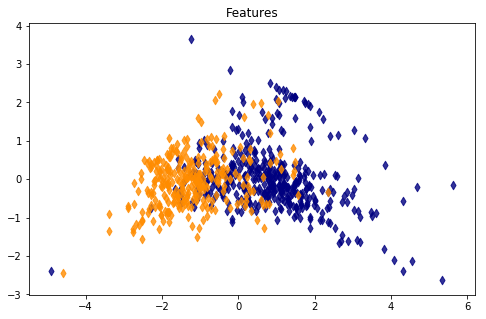

In [6]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in y_new]
shape = ['d' if k>0 else 'd' for k in y_new]
for x, l, c, m in zip(principalComponents_all[:,0], principalComponents_all[:,1], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.title('Features')


In [11]:
ts_features = ts_features.drop(['index', 'frequency', 'Unnamed: 0','nperiods','seasonal_period' ], axis=1)
X = ts_features.drop(['condition' ], axis=1)
names = X.columns.values
print(names)

['trend' 'spike' 'linearity' 'curvature' 'e_acf1' 'e_acf10'
 'seasonal_strength' 'peak' 'trough' 'entropy' 'x_acf1' 'x_acf10'
 'diff1_acf1' 'diff1_acf10' 'diff2_acf1' 'diff2_acf10' 'seas_acf1'
 'max_kl_shift' 'time_kl_shift' 'ARCH.LM' 'max_level_shift'
 'time_level_shift' 'max_var_shift' 'time_var_shift' 'nonlinearity'
 'unitroot_kpss' 'arch_acf' 'garch_acf' 'arch_r2' 'garch_r2' 'lumpiness'
 'stability' 'crossing_points' 'histogram_mode']


In [12]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X[['x_acf1', 'ARCH.LM', 'max_kl_shift', 'crossing_points', 'e_acf1', 'max_level_shift']]), columns= ['x_acf1', 'ARCH.LM', 'max_kl_shift', 'crossing_points', 'e_acf1', 'max_level_shift'])
# pca of features spaces 
pca = PCA(n_components=4)
pca_model = pca.fit(X)
print('Total explained Variance:',np.sum(pca_model.explained_variance_ratio_))


Total explained Variance: 0.9506282996565882


In [13]:
principalComponents_all = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents_all
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

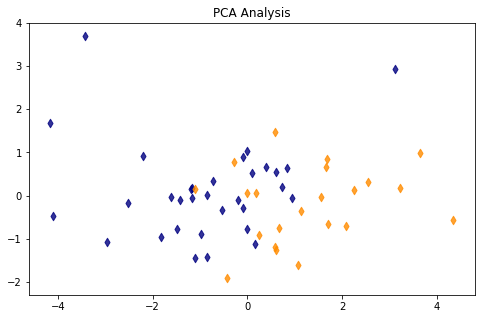

In [14]:
principalDf['cond'] =  ts_features.condition
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in principalDf['cond']]
shape = ['d' if k>0 else 'd' for k in principalDf['cond']]
for x, l, c, m in zip(principalDf['principal component 1'], principalDf['principal component 2'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.title('PCA Analysis')


## Analyse sub cluster in patients data

In [ ]:
from sklearn.preprocessing import StandardScaler
X_p = ts_features_p.drop([ 'frequency', 'Unnamed: 0','nperiods','seasonal_period','condition' ], axis=1)
y_p = ts_features_p['condition']
names = X_p.columns.values
scaler = StandardScaler()
X_p = pd.DataFrame(scaler.fit_transform(X_p), columns= names)

In [ ]:
## Analyse the patients dataset for subclusters
from sklearn.cluster import KMeans
principalComponents_all = pca.fit_transform(X_p)
principalDf_p = pd.DataFrame(data = principalComponents_all
             , columns = ['principal component 1', 'principal component 2'])
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_res = kmeans.fit_predict(principalDf_p)
principalDf_p['cluster'] = kmeans_res+1

In [ ]:
color = ['orange' if x==2  else 'lightblue' if x == 1 else 'red' for x in principalDf_p['cluster'] ]
shape = ['d' if y==2 else 'v' if y==1 else 'x'for y in principalDf_p['cluster']]
fig = plt.figure(figsize=(10,8))
for x, z, c, m in zip(principalDf_p['principal component 1'], principalDf_p['principal component 2'], color, shape):
    plt.scatter(x, z, alpha=0.8, c=c,marker=m)  
    plt.title('Patients PCA Analysis')


## Patients subclusters in general scatter plot

In [ ]:
## Combining both results 
principalDf['cluster'] = 0
binn = principalDf_p['cluster'].copy()
binn.index = range((len(principalDf)-len(principalDf_p)),len(principalDf))
principalDf['cluster'].iloc[(len(principalDf)-len(principalDf_p)):] = binn

In [ ]:
color = ['orange' if x==3  else 'lightblue' if x == 2 else 'red'  if x == 1 else 'indigo'  for x in principalDf['cluster'] ]
shape = ['d' if x==3  else 'v' if x == 2 else 'x'if x == 1 else '.' for x in principalDf['cluster'] ]
fig = plt.figure(figsize=(10,8))
for x, z, c, m in zip(principalDf['principal component 1'], principalDf['principal component 2'], color, shape):
    plt.scatter(x, z, alpha=0.8, c=c,marker=m)  
    plt.title('Three patient clusters')


## Analyse sub cluster in control data

In [ ]:
from sklearn.preprocessing import StandardScaler
X_c = ts_features_c.drop([ 'frequency', 'Unnamed: 0','nperiods','seasonal_period','condition' ], axis=1)
y_c = ts_features_c['condition']
names = X_c.columns.values
scaler = StandardScaler()
X_c = pd.DataFrame(scaler.fit_transform(X_c), columns= names)

In [ ]:
## Analyse the control dataset for subclusters
from sklearn.cluster import KMeans
principalComponents_all = pca.fit_transform(X_c)
principalDf_c = pd.DataFrame(data = principalComponents_all
             , columns = ['principal component 1', 'principal component 2'])
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_res = kmeans.fit_predict(principalDf_c)
principalDf_c['cluster'] = kmeans_res+1

In [ ]:
color = ['orange' if x==2  else 'lightblue' if x == 1 else 'red' for x in principalDf_c['cluster'] ]
shape = ['d' if y==2 else 'v' if y==1 else 'x'for y in principalDf_c['cluster']]
fig = plt.figure(figsize=(10,8))
for x, z, c, m in zip(principalDf_c['principal component 1'], principalDf_c['principal component 2'], color, shape):
    plt.scatter(x, z, alpha=0.8, c=c,marker=m)  
    plt.title('Control PCA Analysis')


## Patients subclusters in general scatter plot

In [ ]:
## Combining both results 
principalDf['cluster'] = 0
binn = principalDf_c['cluster'].copy()
principalDf['cluster'].iloc[:len(principalDf_c)] = binn

In [ ]:
color = ['orange' if x==3  else 'lightblue' if x == 2 else 'red'  if x == 1 else 'indigo'  for x in principalDf['cluster'] ]
shape = ['d' if x==3  else 'v' if x == 2 else 'x'if x == 1 else '.' for x in principalDf['cluster'] ]
fig = plt.figure(figsize=(10,8))
for x, z, c, m in zip(principalDf['principal component 1'], principalDf['principal component 2'], color, shape):
    plt.scatter(x, z, alpha=0.8, c=c,marker=m)  
    plt.title('Three control clusters')


In [ ]:
## The PCA Cluster analysis reveals that one specific cluster of patients is similar to the control group
## The other two cluster are seperable! 
## Goal: Identify the relevant time series features to achieve the best classification. 
## Comment: Kernel PCA has been evaluated, but no improvment 

In [ ]:
X['cluster'] = principalDf['cluster']
X['condition'] = ts_features['condition']

In [ ]:
## Check on linear dependencies between features 

import seaborn as sns
corr = pd.DataFrame(X).corr()
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(corr, 
        xticklabels=corr.columns,yticklabels=corr.columns, annot=True)

In [ ]:
## spikeness,e_acf1, e_acf10, entropy, x_acf1, x_acf10 have the highest correlation towards clusters and condition
## observation: trend is highly correlated with seas_acf and x_acf1/10 and neg. corr. entropy
## observation: trend highly NEGATIVE correlated with linearity! 
## Thought: e_acf1, e_acf10 is first autocorrelation coeff. of e_t --> ARCH Model best fit? 

In [ ]:
X = X.drop(['cluster', 'condition'],axis=1)
y = ts_features['condition']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=123, stratify = y)

In [ ]:
#First feature selection algorithm try
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression 
class_weight = 'balanced'
penalty = 'l2'
C=1e8
n_jobs =1
solver='lbfgs'
logReg = LogisticRegression(C=C,penalty = penalty, random_state=103,solver=solver, n_jobs=n_jobs )
selector = RFE(logReg, n_features_to_select=3, step=1)
selector = selector.fit(X, y)

In [ ]:
from sklearn import svm
class_weight = 'balanced'
degree = 3
C=1
n_jobs =1
kernel='rbf'
clf = svm.SVC(C=C,random_state=103,degree=degree, kernel=kernel )
selector_svm = RFE(clf, n_features_to_select=3, step=1)
selector_svm = selector.fit(X, y)

In [ ]:
feat_select = pd.DataFrame(np.transpose([X.columns.values, selector_svm.ranking_]), columns = ['features','ranking'])
#feat_select.sort_values(by=['ranking'])

In [ ]:
feat_select = pd.DataFrame(np.transpose([X.columns.values, selector.ranking_]), columns = ['features','ranking'])
#feat_select.sort_values(by=['ranking'])

In [ ]:
top_features = ['x_acf1', 'ARCH.LM', 'max_kl_shift', 'crossing_points', 'e_acf1', 'max_level_shift']
fig, axs = plt.subplots(nrows=5,ncols=3, figsize=(13,13))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()
k = 0
for i in range(0,len(top_features)-1):
    for j in range(i+1,len(top_features)):
        color = ['darkorange' if x>0 else 'navy' for x in ts_features.condition]
        shape = ['x' if k>0 else 'd' for k in ts_features.condition]
        for x, l, c, m in zip(X[top_features[i]], X[top_features[j]], color, shape):
            axs[k].scatter(x, l,marker=m, color=c)  
            axs[k].set_xlabel(top_features[i])
            axs[k].set_ylabel(top_features[j])
        k = k+1

In [ ]:
## Visual analysis of separability and correlation anaylsis: 
## -> {eacf, max_level_shift, crossing_points}
## choosen by separability, independence, correlation with condition

In [6]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

X_train,  X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.1, random_state=123, stratify = y_new)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=120)

class_weight = 'balanced'
penalty = 'l2'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=103,penalty = penalty, solver=solver, n_jobs=n_jobs )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,
                               logReg.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)




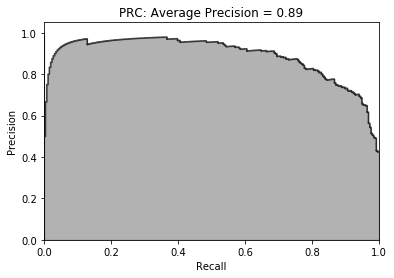

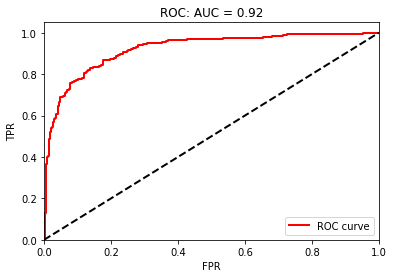

Precision: 0.7329697531949235
Recall: 0.7387743978405316
Average Precision Test: 0.7345327336331834


Text(0.5,1,'PRC: Average Precision Test = 0.73')

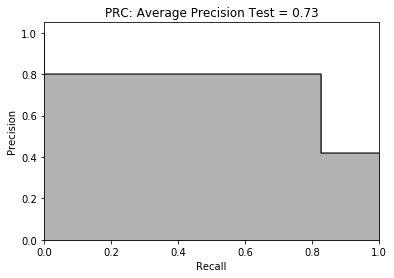

In [8]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()
print('Precision:', np.mean(precision))
print('Recall:', np.mean(recall))
confusion_matrix(y_test, logReg.predict(X_test))

average_precision = average_precision_score(y_test,
                                            logReg.predict(X_test))

print('Average Precision Test:',average_precision )
precision, recall, thresholds = precision_recall_curve(y_test,logReg.predict(X_test))
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision Test = {0:0.2f}'.format(
          average_precision))


In [ ]:
logReg.coef_

In [ ]:
## Potential feature selection with l1 regularization? Look into the theory 
## Does the l1 regularization effect the potential instance generation in the feature space?
## According to l1 regualrization C=0.1, only e_arch1 is left 

In [ ]:
## Separate the data in days --> Does an pattern over the daily structure exist?

## Fit a Gaussian Mixture Model 

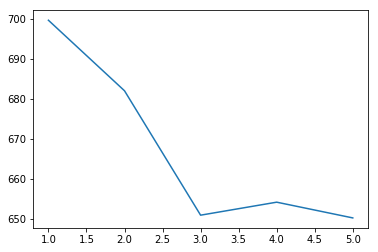

In [15]:
from sklearn.mixture import GaussianMixture 
n_components = range(1, 6)
models = [GaussianMixture(n, covariance_type='spherical', random_state=0)
          for n in n_components]
aics = [model.fit(principalDf.iloc[:,:-1], y=principalDf['cond']).aic(principalDf.iloc[:,:-1]) for model in models]
plt.plot(n_components, aics);


In [16]:
gmm = GaussianMixture(n_components=2, covariance_type='spherical', tol=0.01, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans')
res = gmm.fit_predict(principalDf.iloc[:,:-1], y=principalDf['cond'])
print(gmm.converged_)

True


### Fitted GMM model on the original sample

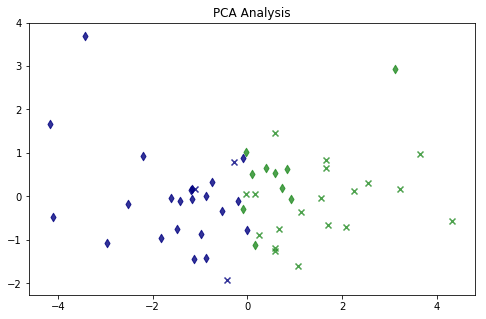

In [17]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>1 else 'navy'if x>0 else 'forestgreen' for x in res]
shape = ['x' if k>0 else 'd' for k in principalDf['cond']]
for x, l, c, m in zip(principalDf['principal component 1'], principalDf['principal component 2'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.title('PCA Analysis')


In [18]:
y_test = principalDf['cond']
X_test = principalDf[['principal component 1','principal component 2','principal component 3','principal component 4']]
X_train = data_new.iloc[:,:-1]
y_train = data_new['cond']

NameError: name 'data_new' is not defined

## Three GMM components generate a mix region

In [19]:
a = gmm.sample(50)
data_new = pd.DataFrame(a[0], columns= ['principal component 1','principal component 2','principal component 3'
                                       ,'principal component 4'])
data_new['cond'] = a[1]

### Synthetic datapoint generated with GMM

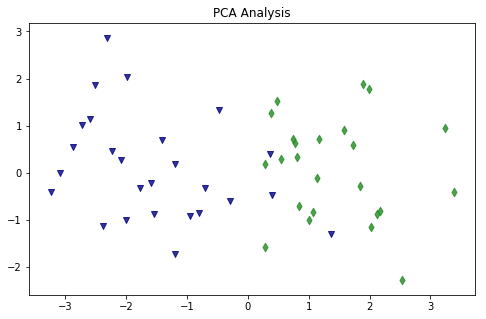

In [20]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>1 else 'navy' if x>0 else 'forestgreen' for x in  data_new['cond']]
shape = ['x' if k>1 else 'v'if k>0 else 'd' for k in data_new['cond']]
for x, l, c,m in zip(data_new['principal component 1'], data_new['principal component 2'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.title('PCA Analysis')

In [21]:
## Idea in the middle class: cosine similarity to either of the two cases and then assign!!!

In [22]:
X_train,  X_test, y_train, y_test = train_test_split(principalDf.iloc[:,:-1],principalDf['cond'],test_size=0.5, random_state=123, stratify = principalDf['cond'])

X_train = pd.DataFrame(pd.concat([X_train, data_new.iloc[:,:-1]], axis=0, sort=False), columns=['principal component 1','principal component 2','principal component 3','principal component 4'])
y_train = pd.DataFrame(pd.concat([y_train, data_new.iloc[:,-1]], axis=0, sort=False), columns=['cond'])

#result = pd.DataFrame(pd.concat([X_train, data_new], axis=0, sort=False), columns=['principal component 1','principal component 2','principal component 3'
                                       #,'principal component 4','cond'])
X_train.index = np.arange(0, len(X_train))
X_test.index = np.arange(0, len(X_test))
y_train.index = np.arange(0, len(y_train))
y_test.index = np.arange(0, len(y_test))

In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss, f1_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

#X_train,  X_test, y_train, y_test = train_test_split(result.iloc[:,:-1],result['cond'],test_size=0.1, random_state=123, stratify = result['cond'])
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=120)

class_weight = 'balanced'
penalty = 'l2'
C=0.1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=103,penalty = penalty, solver=solver, n_jobs=n_jobs )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,
                               logReg.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validati

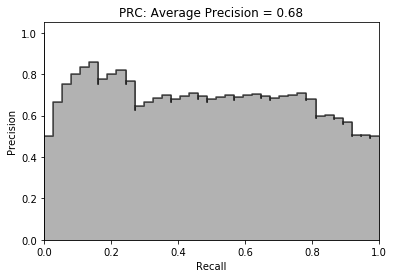

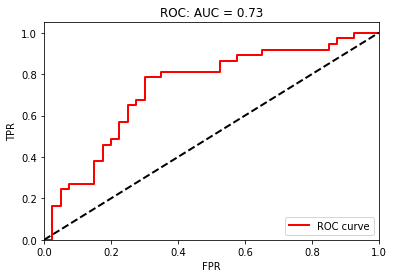

Precision: 0.6418669105415961
Recall: 0.6043243243243243
Average Precision Test: 0.3593073593073593


array([[ 4, 12],
       [ 9,  2]])

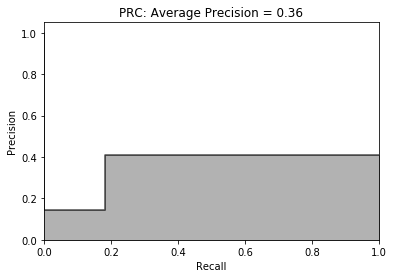

In [24]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()
print('Precision:', np.mean(precision))
print('Recall:', np.mean(recall))

average_precision = average_precision_score(y_test,
                                            logReg.predict(X_test))

print('Average Precision Test:',average_precision )
precision, recall, thresholds = precision_recall_curve(y_test,logReg.predict(X_test))
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))
confusion_matrix(y_test,logReg.predict(X_test))


## Baseline classification 

In [25]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss, f1_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

X_train,  X_test, y_train, y_test = train_test_split(principalDf.iloc[:,:-1],principalDf['cond'],test_size=0.1, random_state=123, stratify = principalDf['cond'])
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=120)

class_weight = 'balanced'
penalty = 'l2'
C=0.1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=103,penalty = penalty, solver=solver, n_jobs=n_jobs )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,
                               logReg.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)




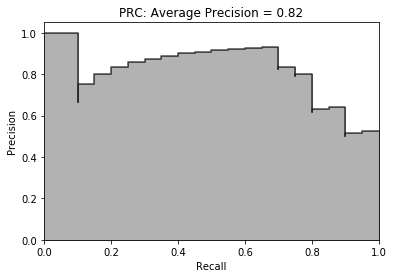

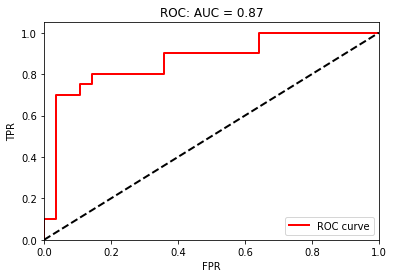

Precision: 0.7480843922462624
Recall: 0.6346153846153847
Average Precision Test: 0.6666666666666666


array([[4, 0],
       [1, 1]])

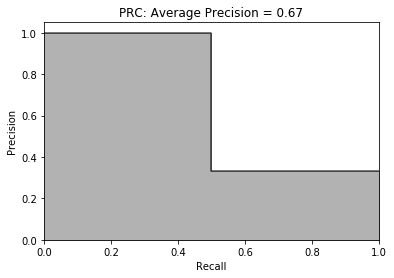

In [26]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()
print('Precision:', np.mean(precision))
print('Recall:', np.mean(recall))

average_precision = average_precision_score(y_test,
                                            logReg.predict(X_test))

print('Average Precision Test:',average_precision )
precision, recall, thresholds = precision_recall_curve(y_test,logReg.predict(X_test))
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))
confusion_matrix(y_test,logReg.predict(X_test))
